In [1]:
import networkx as nx
import osmnx as ox
import seaborn as sns
import numpy as np
import requests
#import plotly.plotly as py
#import plotly.tools as tls
import pandas as pd
pd.options.display.max_rows = 6500
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.8.2'

### Map of Pullman 

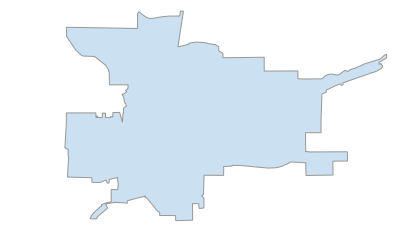

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efb2b5a358>)

In [2]:
city= ox.gdf_from_place('Pullman, Washington')
ox.save_gdf_shapefile(city)
ox.plot_shape(ox.project_gdf(city))

### Walking map of Pullman

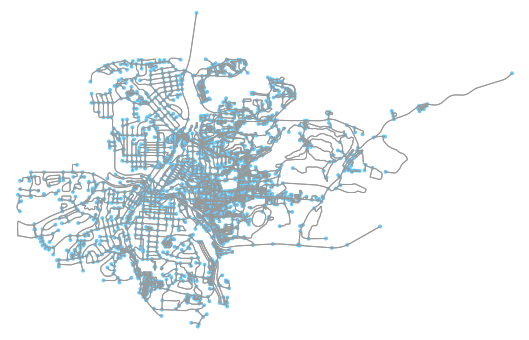

Pullman, Washington, USA


In [3]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='walk')
fig, ax = ox.plot_graph(G)
print(G)

### Driving Map of Pullman

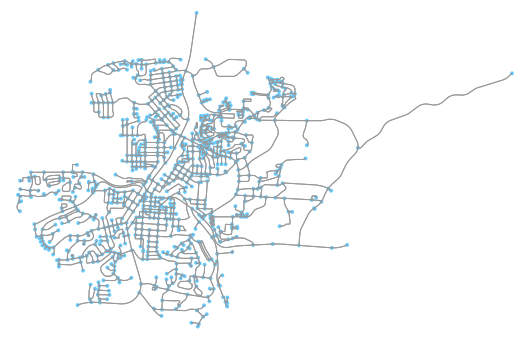

In [4]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

### Bike map of Pullman 

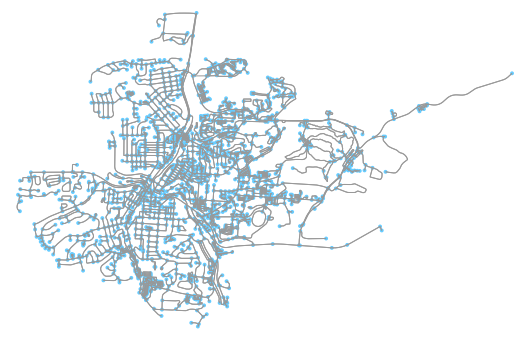

In [5]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='bike')
fig, ax = ox.plot_graph(G)

### Size of area in square meter

In [6]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

32045952.51964416

### Network Circuity 

In [7]:
basic = ox.basic_stats(G)
print(basic['circuity_avg'])

1.1406325236302117


### Average Neighbor degree

In [8]:
adv = ox.extended_stats(G)
print(adv['avg_neighbor_degree'])

{5404041217: 3.0, 2537312946: 3.0, 51527703: 3.0, 51552294: 3.5, 5470150695: 2.6666666666666665, 5470150694: 3.0, 5391360041: 3.0, 5391360046: 3.0, 5391360047: 3.0, 5391360048: 2.3333333333333335, 5470150704: 2.0, 5474451506: 3.0, 5474451508: 3.0, 5470150713: 2.6666666666666665, 5740740671: 2.75, 51576898: 3.0, 5455708237: 3.0, 5455708244: 3.25, 5455708245: 2.6666666666666665, 5455708246: 3.3333333333333335, 5455708247: 3.0, 5455708248: 2.6666666666666665, 5455708249: 3.0, 5455708250: 2.3333333333333335, 5455708251: 3.0, 5455708253: 2.3333333333333335, 5455708254: 3.0, 5455708256: 2.3333333333333335, 6363824224: 2.0, 6363824227: 2.0, 6363824228: 3.3333333333333335, 6363824232: 2.3333333333333335, 6363824233: 3.0, 6363824234: 2.0, 6363824236: 2.0, 5455708273: 3.0, 5455708275: 2.3333333333333335, 6363824248: 3.0, 5455708281: 3.3333333333333335, 6363824250: 3.0, 6363824249: 2.3333333333333335, 6363824251: 3.0, 5455708285: 3.0, 5455708287: 2.0, 6363824256: 3.0, 6363824257: 3.0, 5455708291:

### Number of edges in the graph

In [9]:
basic = ox.basic_stats(G)
print(basic['m'])

5991


### Number of Nodes in the graph 

In [10]:
basic = ox.basic_stats(G)
print(basic['n'])

2319


### K avergae

In [11]:
basic = ox.basic_stats(G)
print(basic['k_avg'])

5.166882276843467


### Number of Intersection

In [12]:
basic = ox.basic_stats(G)
print(basic['intersection_count'])

1761


### Average Street Length

In [13]:
basic = ox.basic_stats(G)
print(basic['street_length_avg'])

93.77712914769016


### Edge Length Total

In [14]:
basic= ox.basic_stats(G)
print(basic['edge_length_total'])

555137.451999998


### Street Length Total 

In [15]:
baisc= ox.basic_stats(G)
print(basic['street_length_total'])

288270.89499999955


### Street Segment count 

In [16]:
baisc= ox.basic_stats(G)
print(basic['street_segments_count'])

3074


### Maximum Page Rank_node

In [17]:
pg = ox.extended_stats(G)
print(pg['pagerank_max_node'])

5740684584


### Max Page Rank

In [18]:
pg = ox.extended_stats(G)
print(pg['pagerank_max'])

0.0014769540070647719


### Minimum Page Rank_node 

In [19]:
pg = ox.extended_stats(G)
print(pg['pagerank_min_node'])

6326554428


###  Minimum Page Rank 

In [20]:
pg = ox.extended_stats(G)
print(pg['pagerank_min'])

7.027606356207962e-05


### Shortesth Path 

In [21]:
sloan = ox.geocode('305 NE Spokane St, Pullman, WA 99163')
martin = ox.geocode('1775 NE Stadium Way, Pullman, WA 99164')

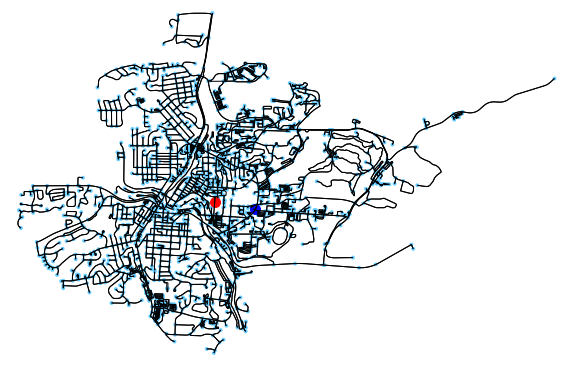

In [22]:
fig, ax = ox.plot_graph(G, fig_height=10, fig_width=10,show=False, close=False, edge_color='black')
ax.scatter(sloan[1], sloan[0], c='red', s=100)
ax.scatter(martin[1], martin[0], c='blue', s=100)

### Amenities in Pullman 

In [23]:
build = ox.buildings_from_place('Pullman')
print(type(build))

<class 'geopandas.geodataframe.GeoDataFrame'>


### Restaurants in Pullman

In [24]:
restaurants = ox.pois_from_place('Pullman', amenities=['restaurant'])


In [25]:
len(restaurants)

33

In [26]:
restaurants.head()

,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,cuisine,delivery,element_type,email,...,opening_hours,osmid,phone,smoking,takeaway,toilets:wheelchair,wheelchair,building,nodes,website
580151963,NaN,NaN,NaN,NaN,NaN,restaurant,pizza,NaN,node,NaN,...,NaN,580151963,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN
687172530,NaN,NaN,NaN,NaN,NaN,restaurant,steak_house,NaN,node,NaN,...,NaN,687172530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1707897405,NaN,NaN,NaN,NaN,NaN,restaurant,chinese,NaN,node,NaN,...,NaN,1707897405,NaN,NaN,NaN,no,yes,NaN,NaN,NaN
2390203350,NaN,NaN,NaN,NaN,NaN,restaurant,chinese,NaN,node,NaN,...,NaN,2390203350,509-332-1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2501960477,NaN,NaN,NaN,NaN,NaN,restaurant,asian,NaN,node,NaN,...,NaN,2501960477,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN


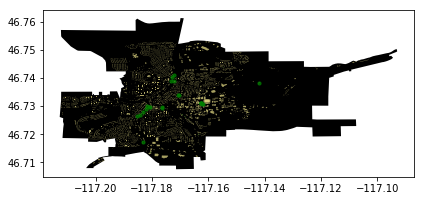

In [27]:
# Plot the footprint
ax = city.plot(facecolor='black')

# Plot street edges
#edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
build.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()

In [28]:
nodes, edges = ox.graph_to_gdfs(G)
print("Nodes:\n", nodes.head(10), '\n')
print("Edges:\n", edges.head(10), '\n')
print("Type:", type(edges))

Nodes:
            highway       osmid        x        y  \
5404041217     NaN  5404041217 -117.158  46.7268   
2537312946     NaN  2537312946 -117.156  46.7337   
51527703       NaN    51527703 -117.126  46.7395   
51552294       NaN    51552294 -117.169  46.7285   
5470150695     NaN  5470150695 -117.156  46.7298   
5470150694     NaN  5470150694 -117.157  46.7293   
5391360041     NaN  5391360041 -117.174    46.74   
5391360046     NaN  5391360046 -117.172   46.741   
5391360047     NaN  5391360047 -117.172  46.7405   
5391360048     NaN  5391360048 -117.173  46.7407   

                                   geometry  
5404041217  POINT (-117.1579002 46.7267835)  
2537312946   POINT (-117.1562978 46.733682)  
51527703    POINT (-117.1264295 46.7394704)  
51552294    POINT (-117.1687993 46.7284931)  
5470150695  POINT (-117.1564954 46.7298494)  
5470150694  POINT (-117.1565437 46.7292809)  
5391360041  POINT (-117.1737957 46.7400347)  
5391360046  POINT (-117.1718975 46.7410487)  
53913

In [29]:
a = build['amenity']
a

37878353                  NaN
37878354                 bank
38114661               school
38115438               cinema
38117437                  NaN
39515214                  NaN
39515220                  NaN
39515222                  NaN
39515225                  NaN
39515228                  NaN
39515229                  NaN
39515232                  NaN
39515242                  NaN
39515250                  NaN
39515251                  NaN
39515252                  NaN
39515253                  NaN
39515254                  NaN
45519495              library
45521084                  NaN
45521112                  NaN
45521170                  NaN
62051184     place_of_worship
113843837                 NaN
134994113                 NaN
134994114                fuel
134994177                 NaN
165266635     public_building
165532451                 NaN
184461830                 NaN
184461832                 NaN
184461833                 NaN
184461861                 NaN
184798720 

### Fast Food Places in Pullman 

In [30]:
ff = ox.pois_from_place('Pullman', amenities=['fast_food'])

In [31]:
fast_food = len(ff)
print(fast_food)

14


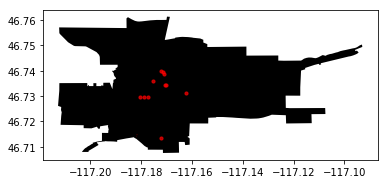

In [32]:
# Plot the footprint
ax = city.plot(facecolor='black')

# Plot street edges
#edges.plot(ax=ax, linewidth=1, edgecolor='white')

# Plot buildings
#build.plot(ax=ax, facecolor='blue', alpha=0.7)

# Plot restaurants
ff.plot(ax=ax, color='red', alpha=0.7, markersize=10)
#cm.tight_layout()

### Schools In Pullman 

In [33]:
school = ox.pois_from_place('Pullman', amenities=['school'])

In [34]:
len(school)

18

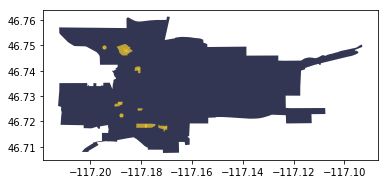

In [35]:
# Plot the footprint
ax = city.plot(facecolor='#333652')

# Plot buildings
#build.plot(ax=ax, facecolor='red', alpha=0.7)

# Plot restaurants
school.plot(ax=ax, color='#FAD02C', alpha=0.7, markersize=10)

### Hospital in Pullman 

In [49]:
hos = ox.pois_from_place('Pullman', amenities=['hospital'])
len(hos)

1

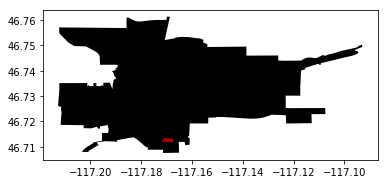

In [50]:
# Plot the footprint
ax = city.plot(facecolor='black')

# Plot buildings
#build.plot(ax=ax, facecolor='#7FE5F0', alpha=0.7)

# Plot restaurants
hos.plot(ax=ax, color='red', alpha=0.7, markersize=10)

In [56]:
bank = ox.pois_from_place('Pullman', amenities=['bank'])
len(bank)

8

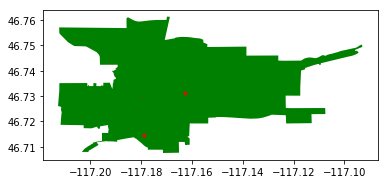

In [57]:
# Plot the footprint
ax = city.plot(facecolor='green')

# Plot buildings
#build.plot(ax=ax, facecolor='#7FE5F0', alpha=0.7)

# Plot restaurants
bank.plot(ax=ax, color='red', alpha=0.7, markersize=10)

In [58]:
plot = [len(ff), len(school), len(hos), len(bank)]

In [59]:
plot

[14, 18, 1, 8]

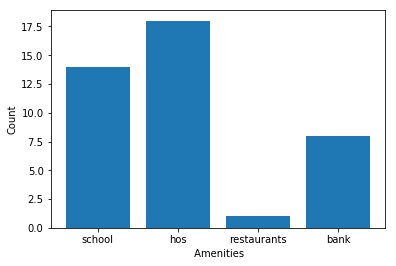

In [42]:
amm = plot
bars = ('school', 'hos', 'restaurants', 'bank')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, amm)

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel(" Amenities")
plt.ylabel("Count")
# Show graphic
plt.show()

In [43]:
point = (46.7298, 117.1817)
dist = 100000
north, south, east, west = ox.bbox_from_point(point, distance=dist)

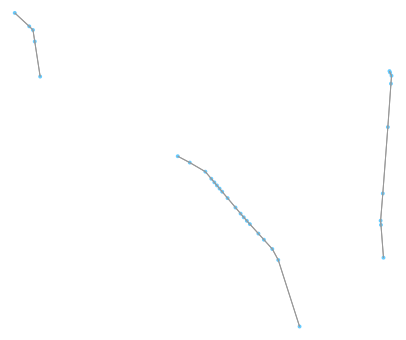

In [44]:
# power lines around Pullam
G = ox.graph_from_bbox(north=north, south=south, east=east, west=west,
                       retain_all=True, simplify=False, infrastructure='way["power"~"line"]')
fig, ax = ox.plot_graph(ox.project_graph(G))